#### TP2: Regression linéaire simple 

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Chargement des données 

In [16]:
df = pd.read_csv('datasets/salaire.csv')
df

,AnneesExpérience,Salaire
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Affichage des cinq premières lignes 

In [17]:
df.head(5) 

,AnneesExpérience,Salaire
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Création d'un nuage de points 

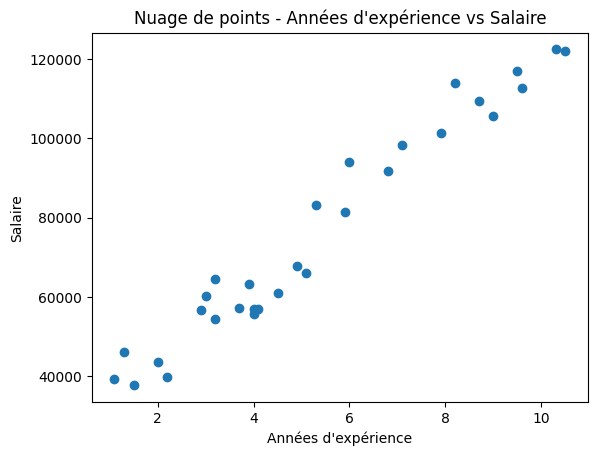

In [18]:
# Nuage de points
plt.scatter(df['AnneesExpérience'], df['Salaire'])
plt.title('Nuage de points - Années d\'expérience vs Salaire')
plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')
plt.show()

#### Extraction des caractéristiques X de la variable cible Y 

In [20]:
# Extraction des caractéristiques (X) et de la variable cible (Y)
X = df[['AnneesExpérience']]
Y = df['Salaire']

# Affichage des premières lignes des caractéristiques (X) et de la variable cible (Y)
print("les caractéristiques de (X):")
print(X.head())

print("\nVariable cible (Y):")
print(Y.head())

les caractéristiques de (X):
   AnneesExpérience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2

Variable cible (Y):
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salaire, dtype: float64


* les caractéristiques (features en anglais) se réfèrent aux variables indépendantes 
dans notre cas c'est X ( les années d'expérience) 
que en utilise pour prédire la variable dépendante (variable cible) dans notre cas c'est Y .
* quand on crée une structure de données qui contient uniquement les années
d'expérience. Ces années d'expérience sont ensuite utilisées comme entrée dans
le modèle de régression linéaire pour prédire les salaires.

#### Normalisation des caractéristiques X en utilisant RobustScaler

In [21]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#### Division des données en ensembles d'entrainement 

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#### Affichage des dimensions des ensembles 

In [23]:
print("Dimensions de l'ensemble d'entraînement (X_train):", X_train.shape)
print ("Dimensions de l'ensemble de test (X_test):", X_test.shape)
print ("Dimensions de l'ensemble d'entraînement (Y_train): ", Y_train.shape)
print ("Dimensions de l'ensemble de test (Y_test):", Y_test.shape)


Dimensions de l'ensemble d'entraînement (X_train): (24, 1)
Dimensions de l'ensemble de test (X_test): (6, 1)
Dimensions de l'ensemble d'entraînement (Y_train):  (24,)
Dimensions de l'ensemble de test (Y_test): (6,)


#### Initialisation d'un modèle de régression linéaire 

In [24]:
model=linear_model.LinearRegression()

#### Entrainement du modèle de régression sur les données d'entrainement (X_train, Y_train) 

In [25]:
model.fit(X_train,Y_train)

LinearRegression()

#### prédiction des valeurs cibles (Y_pred) à partir des données de test (X_test) 

In [26]:
Y_pred=model.predict(X_test)

#### Calcul et affichage des différentes métriques d'évaluation du modèle (Erreurs)

* Erreur quadratique moyenne: 

In [27]:
EQM = mean_squared_error(Y_test, Y_pred)
EQM

49830096.85590839

* Erreur absolu moyenne: 

In [28]:
EAM = mean_absolute_error(Y_test, Y_pred)
EAM

6286.453830757749

* R-squared 

In [29]:
RS = r2_score(Y_test, Y_pred)
RS

0.9024461774180497

#### Visualisation des données réelles (X,Y) et des prédictions ( Y_pred2 )

In [ ]:
Y_pred2 = model.predict(X_scaled)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


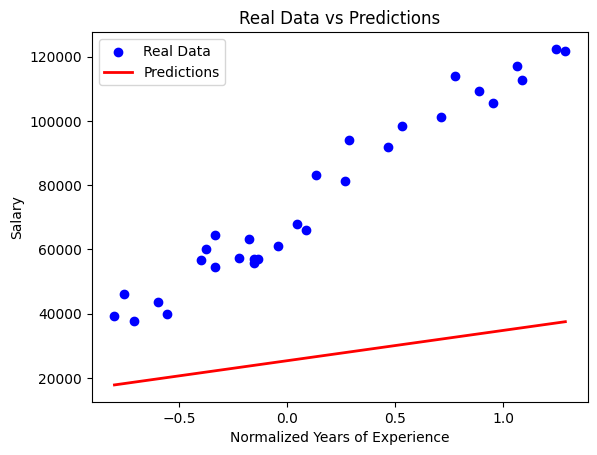

In [36]:
plt.scatter(X_scaled, df['Salaire'], label='Real Data', color='blue', marker='o')
plt.plot(X_scaled, model.predict(X_scaled), color='red', label='Predictions', linewidth=2)
plt.title('Real Data vs Predictions')
plt.xlabel('Normalized Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()